In [1]:
%matplotlib inline

In [2]:
import datetime
most_recent_day = datetime.date(2016, 1, 14)

In [3]:
# Parameters
most_recent_day = "2016-01-14"


In [4]:
from mlops_meetup import datawarehouse
con = datawarehouse.connect_dw()

In [5]:
daily_count = con.execute("""
SELECT 
    reviewDate
    , count(1) as count 
from reviews
group by reviewDate
order by reviewDate
""").df()

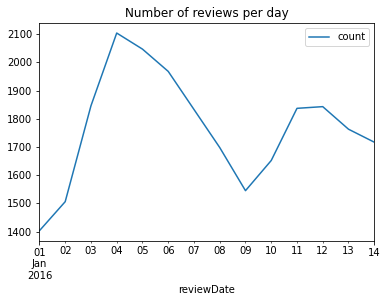

In [6]:
ax = (
    daily_count
    .set_index("reviewDate")
).plot()

ax.set_title("Number of reviews per day");

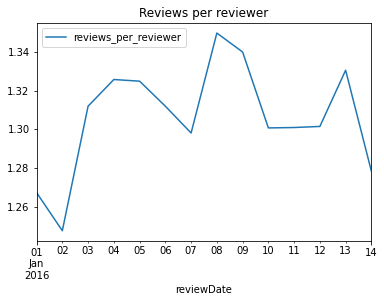

In [7]:
ax = con.execute(
    """
    with reviewcounts as(
        select
            reviewerID
            ,reviewDate
            ,count(asin) as number_reviews
        from reviews
        group by reviewerID, reviewDate
    )
    select reviewDate, avg(number_reviews) as reviews_per_reviewer
    from reviewcounts
    group by reviewDate
    """
).df().set_index("reviewDate").plot()

ax.set_title("Reviews per reviewer");